In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
df=pd.read_csv("D:\\My Study\\program\\Sentiment Analysis of Movie Reviews project\\IMDB Dataset.csv")
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [5]:
review=cv.fit_transform(df['review']).toarray()

In [6]:
df['sentiment']=df['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\mange\AppData\Local\Temp\ipykernel_3880\901530290.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment']=df['sentiment'].replace(['positive','negative'],[1,0])


In [7]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sent_train, sent_test=train_test_split(review,df['sentiment'],test_size=0.2)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [10]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [11]:
predict=model.predict(reviews_test)

In [12]:
predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
model.score(reviews_test,sent_test)

0.8867

In [14]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

sent_pred=model.predict(reviews_test)
cm=confusion_matrix(sent_test,sent_pred)
cm


array([[4400,  610],
       [ 523, 4467]], dtype=int64)

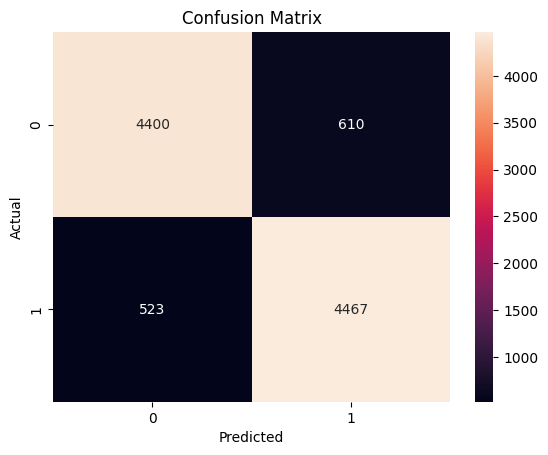

In [15]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import pickle as pk

In [17]:
pk.dump(model,open('model.pkl','wb'))

In [18]:
pk.dump(cv,open('scaler.pkl','wb'))